## Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
<br>
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
<br>

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

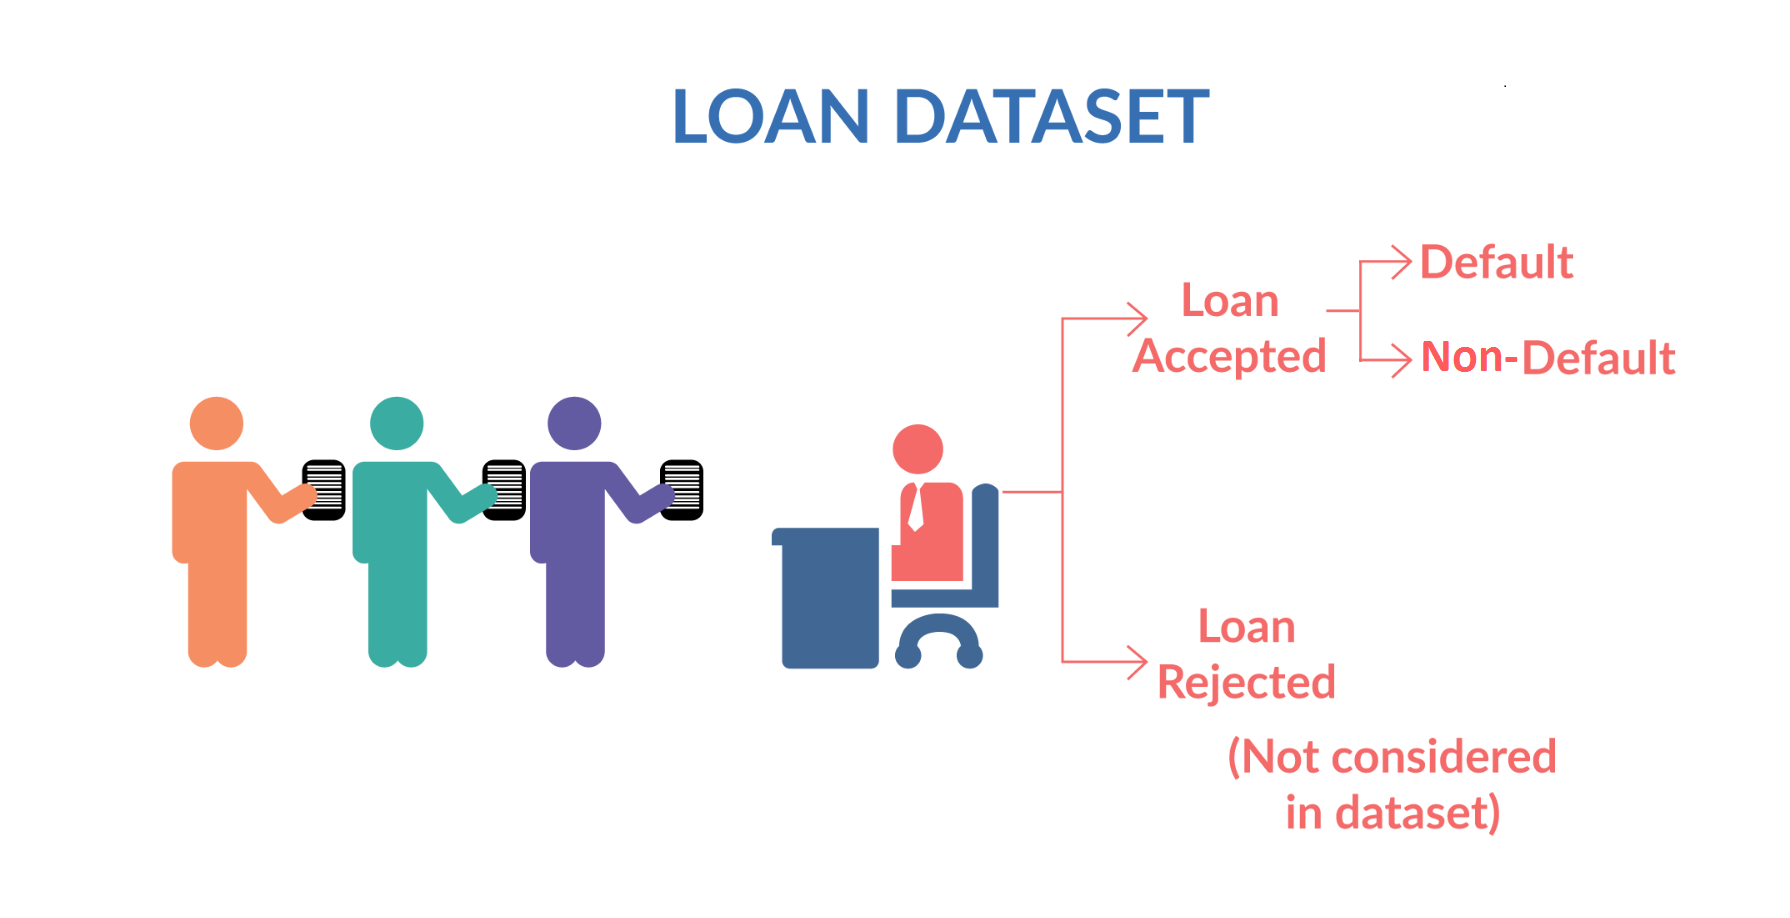
When a person applies for a loan, there are two types of decisions that could be taken by the company:
- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
  - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
  - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
  - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Importing the Necessary Libraries

In [1]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Reading the Excel File

We are setting to get the maximum number of columns and rows and reading the excel in unicode format

In [2]:
pd.set_option('display.max_rows', 130, 'display.max_columns', 130) 
# Was not abe to list all columns so have set the columns and rows
df = pd.read_csv("data/loan.csv",dtype="unicode")  #Reading the file as unicode
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [3]:
df.info() #Number of Rows and Columns and information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [4]:
df.describe() # To find the general sense of data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1009147,516636,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


### Data Cleaning

Here we attempt to clean the data by doing the following processes
1. **Missing Values Removal**
2. **Dropping unwanted columns**
3. **Filling in Missing Values**
4. **Data type Validation and Rectification**
5. **Removing Outliers**

Lets glance on the data and get insights

In [5]:
#Glacing at the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

#### 1. Missing Values Removal

On analysing the above we can see that the last columns are having many null values lets analyse it closely by taking and checking the null values individually of a column


In [6]:
# By percentage amount how much is null values in a given column
(df.isnull().sum()/df.shape[0])*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
df1 = df.dropna(axis=1, how='all') # Removed columns which has all null values
#Now lets check the shape of the new dataframe
df1.shape

(39717, 57)

In the previous dataframe we had 111 columns,
now we have only 57 columns as we have removed the columns which have unwanted entries
<br>
Lets now again check the null values in our new dataframe

In [8]:
(df1.isnull().sum()/df1.shape[0])*100 #Analysing columns

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# Dropping null values which are having more than 30% of null values as it might skew our analysis
df1.drop(axis=1,columns=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"], inplace=True)
df1.shape # Have removed four columns

(39717, 53)

Now We can still seem some null values with significant lower percentages are present.
For this we will require analysis of each column , but before that lets move on to the dropping columns section of data cleaning

#### 2. Dropping Unwanted Columns
<br>
Lets drop the columns which have the relatively same values and do not contribute or require any analysis from our level

In [10]:
#Lets check the current dataframe
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


Now analysing the below columns we can see that
 - **title**:Title and purpose have relatively the same meaning so we can drop Title Column
 - **zip_code**: Since we have the state we can ignore the zip codes as it is also masked with xx
 - **url**: Since not required for our analysis
 - **id**: Not required as it indicates personal information of the customer
 - **member_id**: Not required as it indicates personal information of the customer
 - **emp_title**: Personal information not required

In [11]:
# Dropping those columns
df1.drop(axis=1,columns=["title","url","zip_code","id","member_id","emp_title"], inplace=True)
#Finding the columns which have a single value
df1.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status               1
out_prncp                   

Now we can see that some columns have just one value which do not give us any additional information, so we
can remove these columns:
 - pymnt_plan
 - initial_list_status
 - collections_12_mths_ex_med
 - policy_code
 - application_type
 - acc_now_delinq
 - chargeoff_within_12_mths
 - delinq_amnt
 - tax_liens

In [12]:
df2 = df1.loc[:,df1.nunique()!=1] # Dropping it and initialising it to a new dataframe for the next of data validation
#Lets check the shape of the new dataframe
df2.shape

(39717, 38)

#### 3.  Filling in Missing Values

Now since majority of the empty columns are removed , now we can fill in the missing values in column

In [13]:
#Checking Null Values in the existing data
df2.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

#### Analysis

Looking at the above we can see the missing columns as
- **emp_length**: 1075
- **revol_util**: 50
- **last_pymnt_d**: 71
- **last_credit_pull_d**:  2
- **pub_rec_bankruptcies**: 697

Now lets analyse these columns one by one

In [14]:
df2["emp_length"].value_counts()
#Since 10+ years are having maximum as 8879 and number of null values is 1075
#And if we fill any of the values it might impact the analysis in a significant way
#Hence we can drop the rows

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [15]:
df3 = df2[~df2["emp_length"].isna()]
df3.shape # Now dropping all the rows which doesnt have employee length

(38642, 38)

In [16]:
df3["revol_util"].value_counts()
#Maximum is 0% so then we can fill in the mode value as there are only 50 null value records

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
24.63%      1
36.94%      1
43.61%      1
32.71%      1
7.43%       1
Name: revol_util, Length: 1087, dtype: int64

In [17]:
#Filling with maximum value
df3["revol_util"] = df3["revol_util"].fillna(df3["revol_util"].mode()[0]) 
df3["revol_util"].isnull().sum()

0

In [18]:
df3["last_pymnt_d"].value_counts()
#Null values is 71 rows since the highest is 1256 we can drop the rows 

May-16    1209
Mar-13    1001
Dec-14     911
May-13     884
Feb-13     846
Mar-12     828
Apr-13     822
Aug-12     811
Oct-12     809
Mar-14     805
Jan-14     801
Aug-14     797
Jul-14     793
Oct-14     778
Jan-13     769
Feb-14     768
Dec-13     758
Sep-12     753
Jul-13     750
Jun-14     744
Jul-12     724
Nov-12     723
Apr-12     721
Feb-12     719
May-12     718
Aug-13     702
Dec-12     691
Jun-12     683
Oct-13     672
Jun-13     671
May-14     659
Sep-14     658
Sep-13     655
Apr-14     653
Nov-13     646
Nov-14     560
Jan-12     534
Dec-11     528
Mar-11     475
Nov-11     441
Sep-11     440
Oct-11     438
Aug-11     423
Apr-11     411
Jul-11     385
May-11     373
Jun-11     364
Feb-11     331
Jan-15     326
Jan-11     265
Dec-10     250
Jul-15     244
Nov-15     222
Apr-16     217
Jun-15     216
Oct-10     215
Mar-16     210
Aug-15     200
Sep-15     199
Nov-10     191
Jul-10     188
Oct-15     182
Mar-15     180
Jan-16     178
Sep-10     175
Dec-15     171
Feb-16    

In [19]:
df3 = df3[~df3["last_pymnt_d"].isna()]
df3.shape # Now dropping all the rows which doesnt have last payment date

(38576, 38)

In [20]:
df3["last_credit_pull_d"].value_counts()
# Since there are only 2 records missing and the maximum value is May-16 we can fill in the last credit date

May-16    10041
Apr-16     2477
Mar-16     1096
Feb-13      832
Feb-16      714
Jan-16      641
Dec-15      627
Mar-13      560
Mar-14      545
Dec-14      538
Jul-14      537
Jul-15      520
Sep-14      519
Feb-14      515
Nov-15      512
Oct-14      507
Sep-15      500
Aug-14      498
Jan-14      496
Oct-15      489
Apr-14      482
Nov-14      478
Nov-13      454
May-14      454
Jun-14      442
May-13      438
Jan-15      428
May-15      418
Apr-13      414
Dec-13      412
Aug-15      412
Oct-13      402
Nov-12      392
Jul-13      383
Sep-12      383
Sep-13      377
Apr-15      373
Jun-15      371
Dec-12      363
Aug-12      362
Mar-15      362
Aug-13      361
Jun-13      358
Feb-12      353
Feb-15      345
Mar-12      327
Oct-12      325
May-12      318
Apr-12      301
Jun-12      296
Jul-12      290
Mar-11      253
Jan-12      253
Aug-11      245
Dec-11      235
Nov-11      189
May-11      184
Jun-11      162
Sep-11      155
Jul-11      150
Feb-11      148
Oct-11      141
Apr-11  

In [21]:
df3["last_credit_pull_d"] = df3["last_credit_pull_d"].fillna(df3["last_credit_pull_d"].mode()[0])
df3["last_credit_pull_d"].isnull().sum() # Filling the empty rows with the credit date

0

In [22]:
df3["pub_rec_bankruptcies"].value_counts()
# Since the maximum value is 0 with 36315 records and null values is 697
# And plus since public record bankruptcies are not that common we can assign it as 0

0    36315
1     1557
2        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
df3["pub_rec_bankruptcies"] = df3["pub_rec_bankruptcies"].fillna(df3["pub_rec_bankruptcies"].mode()[0])
df3["pub_rec_bankruptcies"].isnull().sum() # Filling the empty rows with the credit date

0

In [24]:
df3.isnull().sum() #Now all missing values have been rectified

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

#### 4. Data type Validation and Rectification
<br>
Now we can analyse each column data types and validate its data and if missing values are found we can fill or drop it
Given below we can check the current data types of our dataset

In [25]:
# Checking the Data types of DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38576 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   loan_amnt                38576 non-null  object
 1   funded_amnt              38576 non-null  object
 2   funded_amnt_inv          38576 non-null  object
 3   term                     38576 non-null  object
 4   int_rate                 38576 non-null  object
 5   installment              38576 non-null  object
 6   grade                    38576 non-null  object
 7   sub_grade                38576 non-null  object
 8   emp_length               38576 non-null  object
 9   home_ownership           38576 non-null  object
 10  annual_inc               38576 non-null  object
 11  verification_status      38576 non-null  object
 12  issue_d                  38576 non-null  object
 13  loan_status              38576 non-null  object
 14  purpose                  38576 non-nul

##### Analysing All Columns which can be converted to numeric

Based on analysing the data we can observe that:
- **Integer**: Need to convert the columns **delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies** to integer
- **Float**:Here we can convert the columns **loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv, total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt** to float without any preprocessing
- **Remove % signs and convert to float for int_rate,revol_util** 
- **Date**: Convert date columns to proper format for extracting years and months for columns **issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d**

#### Integer Data Type Conversion

In [26]:
df4 = pd.DataFrame(df3) #Initializing new data frame for data type validation
integer_columns = ["delinq_2yrs","inq_last_6mths","open_acc","pub_rec","total_acc","pub_rec_bankruptcies"]
df4[integer_columns] = df4[integer_columns].astype("int")
df4[integer_columns].describe()

,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,0.146723,0.869323,9.321106,0.053271,22.132544,0.040725
std,0.492051,1.069318,4.395235,0.233851,11.392282,0.198570
min,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,6.000000,0.000000,14.000000,0.000000
50%,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000
75%,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000
max,11.000000,8.000000,44.000000,4.000000,90.000000,2.000000


#### Float Data Type Conversion

In [27]:
# Here loan_amnt, funded_amnt and funded_amnt_inv data type is shown as object we can convert it to numeric
float_columns = ["loan_amnt","funded_amnt","funded_amnt_inv","installment","annual_inc","dti","revol_bal",
                   "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
                   "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt"]
df4[float_columns] = df4[float_columns].astype("float")
df4[float_columns].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,38576.000000,38576.000000,38576.000000,38576.000000,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,11296.066855,11021.082409,10460.893482,326.862965,6.964454e+04,13.327433,13469.338319,51.316868,51.072601,12263.346687,11663.654475,9881.519882,2285.715361,1.374033,94.737495,12.338970,2706.766460
std,7460.746022,7191.288703,7139.505658,209.092000,6.429368e+04,6.666155,15921.947129,376.914886,375.536930,9051.105239,8957.348835,7070.317593,2616.010579,7.337809,691.172914,149.472081,4470.088615
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5500.000000,5000.000000,168.450000,4.150000e+04,8.210000,3751.750000,0.000000,0.000000,5633.049926,5196.242500,4789.437500,674.920000,0.000000,0.000000,0.000000,223.092500
50%,10000.000000,9962.500000,9000.000000,283.045000,6.000000e+04,13.420000,8947.000000,0.000000,0.000000,10042.366460,9395.370000,8000.000000,1370.935000,0.000000,0.000000,0.000000,556.445000
75%,15000.000000,15000.000000,14437.911440,434.442500,8.320050e+04,18.590000,17164.500000,0.000000,0.000000,16657.606558,15931.080000,13953.910000,2862.047500,0.000000,0.000000,0.000000,3348.667500
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


#### Remove Percentage Signs and Convert to Float

In [28]:
#Now  int_rate and revol_util columns have % sign is present and is object type so we require to remove and convert to float
#So created a generic function that can be passed and used in both the cases
def percentage_to_float(x):
    x = x.replace("%","")
    return float(x)
percentage_to_float("100.02%")

100.02

In [29]:
df4["int_rate"] = df4["int_rate"].apply(percentage_to_float)
df4["revol_util"] = df4["revol_util"].apply(percentage_to_float)
df4[["int_rate","revol_util"]].head()
#Converted and displayed below

,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5
3,13.49,21.0
4,12.69,53.9


#### Date Conversion

Convert date columns to proper format for extracting years and months for columns issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d

In [30]:
#Date Coversion into proper format
df4["issue_date"] = pd.to_datetime(df4["issue_d"],format="%b-%y")
df4["earliest_cr_line_date"] = pd.to_datetime(df4["earliest_cr_line"],format="%b-%y")
df4["last_pymnt_date"] = pd.to_datetime(df4["last_pymnt_d"],format="%b-%y")
df4["last_credit_pull_date"] = pd.to_datetime(df4["last_credit_pull_d"],format="%b-%y")
print(df4.shape) # Checking the shape after adding 4 additional columns
df4.head()

(38576, 42)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date,earliest_cr_line_date,last_pymnt_date,last_credit_pull_date
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783.0,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,2011-12-01,1996-01-01,2016-05-01,2016-05-01


In [31]:
#After conversion lets check the data type
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38576 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38576 non-null  float64       
 1   funded_amnt              38576 non-null  float64       
 2   funded_amnt_inv          38576 non-null  float64       
 3   term                     38576 non-null  object        
 4   int_rate                 38576 non-null  float64       
 5   installment              38576 non-null  float64       
 6   grade                    38576 non-null  object        
 7   sub_grade                38576 non-null  object        
 8   emp_length               38576 non-null  object        
 9   home_ownership           38576 non-null  object        
 10  annual_inc               38576 non-null  float64       
 11  verification_status      38576 non-null  object        
 12  issue_d                  38576 n

#### 5 Removing Outliers

In [32]:
#Glancing the data
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38576 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38576 non-null  float64       
 1   funded_amnt              38576 non-null  float64       
 2   funded_amnt_inv          38576 non-null  float64       
 3   term                     38576 non-null  object        
 4   int_rate                 38576 non-null  float64       
 5   installment              38576 non-null  float64       
 6   grade                    38576 non-null  object        
 7   sub_grade                38576 non-null  object        
 8   emp_length               38576 non-null  object        
 9   home_ownership           38576 non-null  object        
 10  annual_inc               38576 non-null  float64       
 11  verification_status      38576 non-null  object        
 12  issue_d                  38576 n

(25, 25)


<AxesSubplot:>

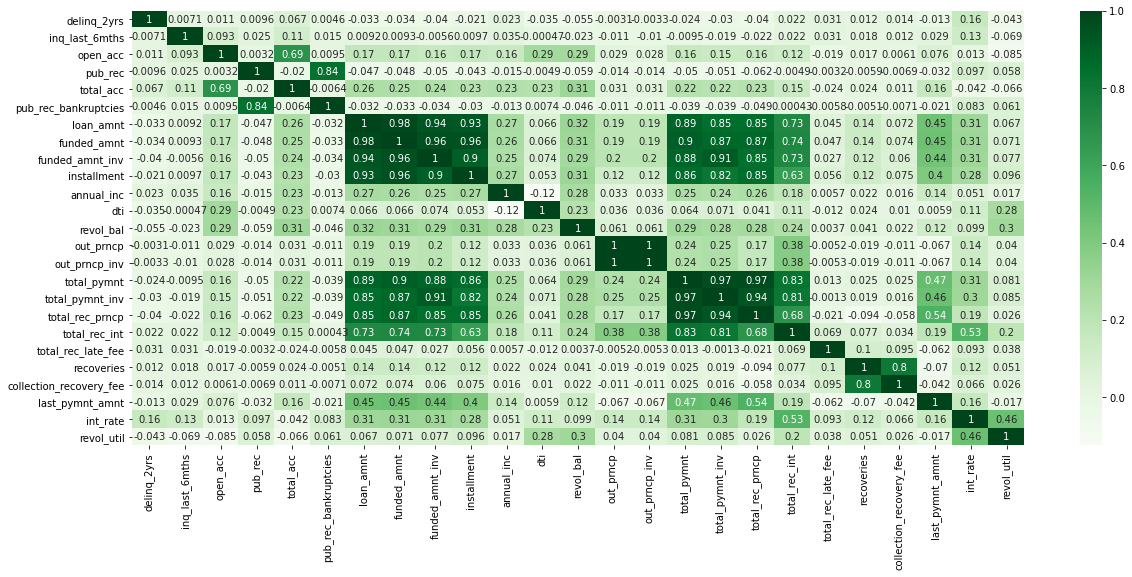

In [33]:
# Now for removing outliers we only need to check in numerical data
# We can check for correlation among numerical variables
numerical_columns = integer_columns + float_columns + ["int_rate","revol_util"]
df_corr = df4[numerical_columns].corr()
print(df_corr.shape)
plt.figure(figsize=[20,8])
sns.heatmap(df_corr,cmap="Greens",annot=True)

###### Looking at the above correlation matrix among numerical variables we can see that :
- There is a high correlation among **loan_amnt,funded_amnt,funded_amnt_inv,installment**
- There is a high correlation among **total_paymnt,total_pymnt_inv,total_rec_prncp,total_rec_int**
- The columns in above two points are also highly correlated among each other

So we can take each column in one of these groups and analyse whether there are any outliers in these groups and remove those
So the columns we can analyse for outliers are:
- loan_amnt
- total_paymnt

<br>Additionally based on domain knowledge we can identify main features in which outliers can be present and should be eliminated for numerical values<br>
- annual_inc
- revol_bal

In [34]:
#Describe Annual Income and Revolving Balance
domain_based_numerical = ["annual_inc","revol_bal"]
df4[domain_based_numerical].describe()

,annual_inc,revol_bal
count,3.857600e+04,38576.000000
mean,6.964454e+04,13469.338319
std,6.429368e+04,15921.947129
min,4.000000e+03,0.000000
25%,4.150000e+04,3751.750000
50%,6.000000e+04,8947.000000
75%,8.320050e+04,17164.500000
max,6.000000e+06,149588.000000


<AxesSubplot:xlabel='annual_inc'>

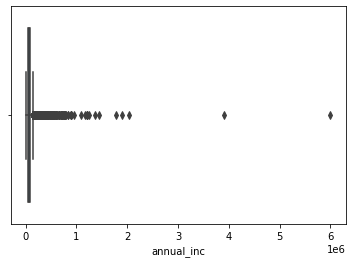

In [35]:
sns.boxplot(df4["annual_inc"])
# Based on description we can see that there are many outliers with annual income > 150000

(36409, 42)


<AxesSubplot:xlabel='annual_inc'>

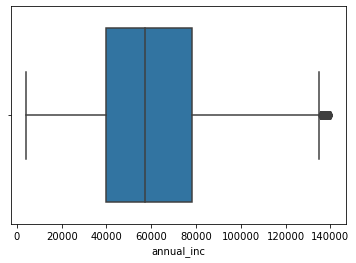

In [36]:
# Removing Outliers from Annual Income
df5 = df4[df4["annual_inc"] < 140000]
print(df5.shape)
sns.boxplot(df5["annual_inc"])

<AxesSubplot:xlabel='revol_bal'>

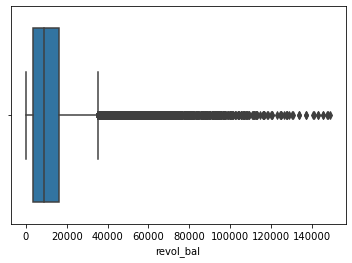

In [37]:
sns.boxplot(df5["revol_bal"])
# Based on description we can see that there are many outliers with revol_bal > 30000

(33530, 42)


<AxesSubplot:xlabel='revol_bal'>

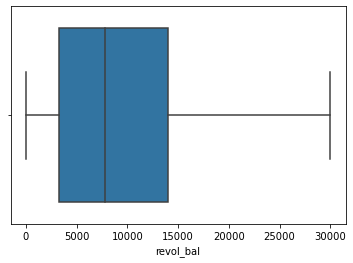

In [38]:
# Removing Outliers from revol_bal
df5 = df5[df5["revol_bal"] < 30000]
print(df5.shape)
sns.boxplot(df5["revol_bal"])

In [39]:
# Checking Describe of Loan related columns
loan_amnt_correlators=["loan_amnt","funded_amnt","funded_amnt_inv","installment"]
df5[loan_amnt_correlators].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment
count,33530.000000,33530.000000,33530.000000,33530.000000
mean,10484.484790,10259.158962,9749.469068,304.434947
std,6816.269313,6579.884992,6529.038365,189.780702
min,500.000000,500.000000,0.000000,15.690000
25%,5000.000000,5000.000000,4975.000000,162.252500
50%,9000.000000,9000.000000,8250.000000,267.330000
75%,14400.000000,14000.000000,13200.000000,399.780000
max,35000.000000,35000.000000,35000.000000,1288.100000


<AxesSubplot:xlabel='loan_amnt'>

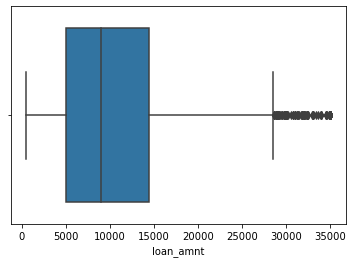

In [40]:
sns.boxplot(df5["loan_amnt"])
#We can remove the outliers of amount > 29000

(32882, 42)


<AxesSubplot:xlabel='loan_amnt'>

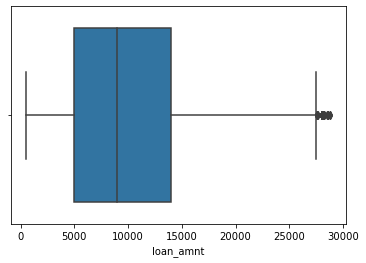

In [41]:
# Removing Outliers from Loan Amount
df5 = df5[df5["loan_amnt"] < 29000]
print(df5.shape)
sns.boxplot(df5["loan_amnt"])

In [42]:
# Checking Describe of Payment related columns
total_paymnt_correlators=["total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int"]
df5[total_paymnt_correlators].describe()

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,32882.000000,32882.000000,32882.000000,32882.000000
mean,10902.470747,10372.272653,8869.124770,1954.483647
std,7419.630464,7362.582229,5911.329914,2071.174006
min,33.730000,0.000000,0.000000,6.220000
25%,5387.698578,4885.252500,4300.000000,630.172500
50%,9199.584629,8676.610000,7800.000000,1245.905000
75%,14889.237652,14333.155000,12000.000000,2488.840000
max,45560.540060,45228.960000,28800.000000,17704.040000


<AxesSubplot:xlabel='total_pymnt'>

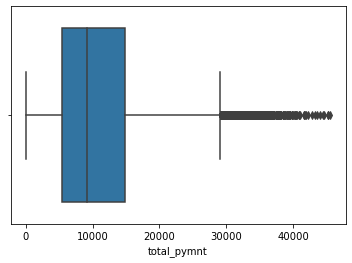

In [43]:
sns.boxplot(df5["total_pymnt"])
#We can remove the outliers of more than 29000

(31955, 42)


<AxesSubplot:xlabel='total_pymnt'>

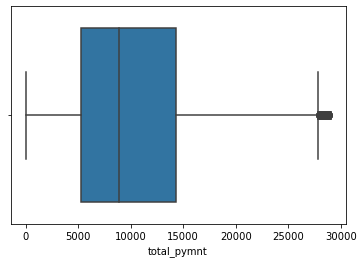

In [44]:
# Removing Outliers from total_pymnt
df5 = df5[df5["total_pymnt"] < 29000]
print(df5.shape)
sns.boxplot(df5["total_pymnt"])

## Univariate Analysis

Before we begin, we will require business knowledge and hence analyse these variables one by one
Lets glance at the current data and find the main driving variables and need to perform the following functions:
- Categorize data into numerical and categorical
- Analyse Categorical Data
- Analyse Numerical Data
- Identify derived values like month,year,ratio,etc

In [45]:
#Shape of dataframe
print(df5.shape)
df5.head(10)

(31955, 42)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date,earliest_cr_line_date,last_pymnt_date,last_credit_pull_date
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783.0,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,2011-12-01,1996-01-01,2016-05-01,2016-05-01
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963.0,28.3,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0,2011-12-01,2004-11-01,2015-01-01,2016-01-01
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726.0,85.6,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0,2011-12-01,2005-07-01,2016-05-01,2016-05-01
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221.0,87.5,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0,2011-12-01,2007-01-01,2015-01-01,2014-12-01
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210.0,32.6,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0,2011-12-01,2004-04-01,2012-04-01,2012-08-01
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279.0,36.5,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0,2011-12-01,2004-09-01,2012-11-01,2013-03-01


#### Categorize Data into Numerical and Categorical

Looking at the data we can categorize these columns as:
- **Categorical Data**: term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,  purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
- **Continuous Data**: loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,revol_util, total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_in,total_rec_late_fee,recoveries	collection_recovery_fee,last_pymnt_amnt
- **Derived Data** : We can analyse the dates with the proper format as well as original and derived as
   - issue_d -> issue_month,issue_date,issue_year
   - earliest_cr_line -> earliest_cr_line_date,earliest_cr_line_year,earliest_cr_line_month
   - last_pymnt_d -> last_pymnt_date,last_pymnt_month,last_pymnt_year
   - last_credit_pull_d -> last_credit_pull_date,last_credit_pull_year,last_credit_pull_month
   

#### Categorical Data Analysis
Here we can analyse the categorical data 

In [46]:
#Defining a common function for doing Univariate Analysis of Categorical Columns
def categorical_data_frame(column):
    percent_proportion = (df5[column].value_counts()/df5[column].value_counts().sum())*100
    categorical_df = pd.DataFrame({'Count':df5[column].value_counts(),
                                 '% of Data': percent_proportion.round(2)})
    print(categorical_df)
    df5[column].value_counts().plot.bar()

            Count  % of Data
 36 months  24401      76.36
 60 months   7554      23.64


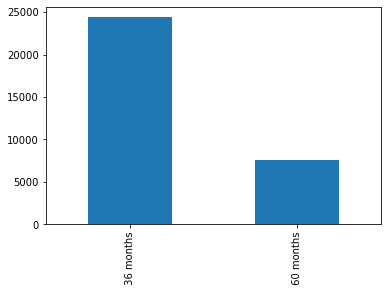

In [47]:
#Analyzing and plotting Term
categorical_data_frame("term")
#Nearly 76% of loans are allocated for the term of 3 years
# and only 24% is being allocated for the term of 5 years

<AxesSubplot:ylabel='term'>

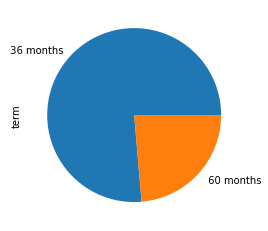

In [48]:
#Plotting Pie Chart for term
df5["term"].value_counts().plot.pie()

   Count  % of Data
B   9819      30.73
A   8601      26.92
C   6651      20.81
D   4176      13.07
E   1928       6.03
F    625       1.96
G    155       0.49


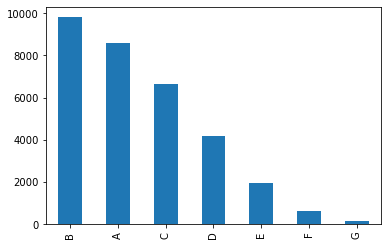

In [49]:
#Analyzing and plotting Grade
categorical_data_frame("grade")
#Most of the loans from A-D comprising of nearly 76% of volume

    Count  % of Data
A4   2468       7.72
B3   2338       7.32
A5   2313       7.24
B5   2220       6.95
B4   2022       6.33
C1   1732       5.42
B2   1703       5.33
C2   1641       5.14
A3   1568       4.91
B1   1536       4.81
A2   1301       4.07
C3   1275       3.99
D2   1069       3.35
C4   1039       3.25
C5    964       3.02
A1    951       2.98
D3    932       2.92
D1    782       2.45
D4    743       2.33
D5    650       2.03
E1    557       1.74
E2    447       1.40
E3    378       1.18
E4    305       0.95
E5    241       0.75
F1    194       0.61
F2    150       0.47
F3    114       0.36
F4    103       0.32
F5     64       0.20
G1     55       0.17
G2     42       0.13
G3     25       0.08
G4     20       0.06
G5     13       0.04


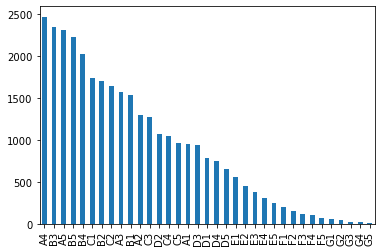

In [50]:
#Analyzing and plotting Sub Grade
categorical_data_frame("sub_grade")
#In the subgrade we can see that grades are distributed in the higher end like after A4 then A3
# Plus we can see that F and G are least preferred

           Count  % of Data
10+ years   6492      20.32
< 1 year    4025      12.60
2 years     3837      12.01
3 years     3542      11.08
4 years     2946       9.22
1 year      2813       8.80
5 years     2770       8.67
6 years     1857       5.81
7 years     1472       4.61
8 years     1181       3.70
9 years     1020       3.19


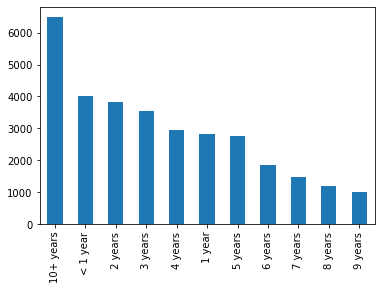

In [51]:
#Analyzing and plotting Emp Length
categorical_data_frame("emp_length")
# So maximum loan is allocated to employees who is having more years of experience

          Count  % of Data
RENT      16695      52.25
MORTGAGE  12708      39.77
OWN        2462       7.70
OTHER        87       0.27
NONE          3       0.01


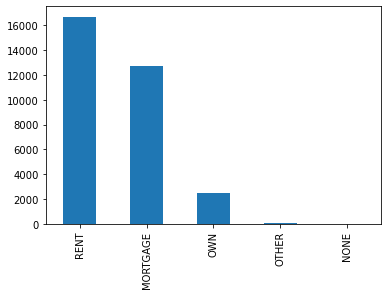

In [52]:
#Analyzing and plotting Home Ownership
categorical_data_frame("home_ownership")
# More than half of Loans are allocated to people who are staying as rent

                 Count  % of Data
Not Verified     14958      46.81
Source Verified   8509      26.63
Verified          8488      26.56


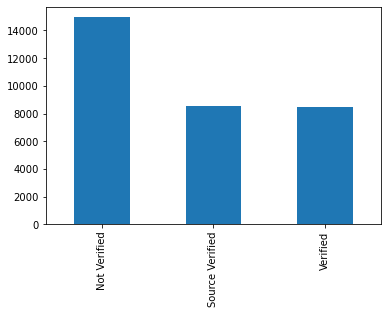

In [53]:
#Analyzing and plotting Verification Status
categorical_data_frame("verification_status")
#Nearly half of the loans are given without income verification

             Count  % of Data
Fully Paid   26732      83.66
Charged Off   4493      14.06
Current        730       2.28


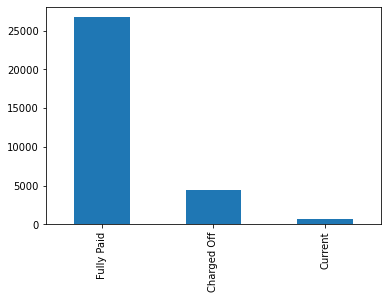

In [54]:
#Analyzing and plotting Loan Status
categorical_data_frame("loan_status")
#Most of the loans are fully paid
#We can remove the current loan status customers as we are focusing only on defaults

(31225, 42)
             Count  % of Data
Fully Paid   26732      85.61
Charged Off   4493      14.39


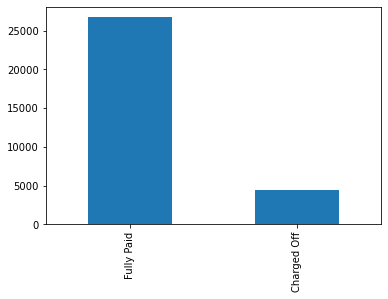

In [55]:
#Dropping rows with loan status as Current
df5 = df5[df5["loan_status"] != "Current"]
print(df5.shape)
categorical_data_frame("loan_status") 
#Since we are dropping current columns we can drop out_prncp and out_prncp_inv
df5.drop(axis=1,columns=["out_prncp","out_prncp_inv"], inplace=True)

                    Count  % of Data
debt_consolidation  14647      46.91
credit_card          3937      12.61
other                3243      10.39
home_improvement     2136       6.84
major_purchase       1846       5.91
car                  1279       4.10
small_business       1277       4.09
wedding               821       2.63
medical               573       1.84
moving                503       1.61
vacation              324       1.04
educational           282       0.90
house                 280       0.90
renewable_energy       77       0.25


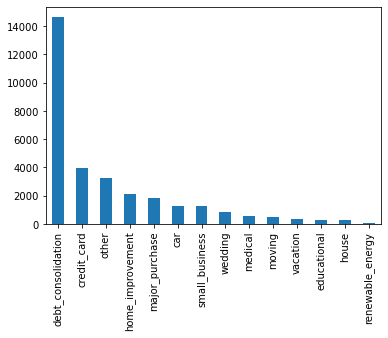

In [56]:
#Analyzing and plotting Purpose
categorical_data_frame("purpose")
# More than half of it is for debt consolidation

<AxesSubplot:>

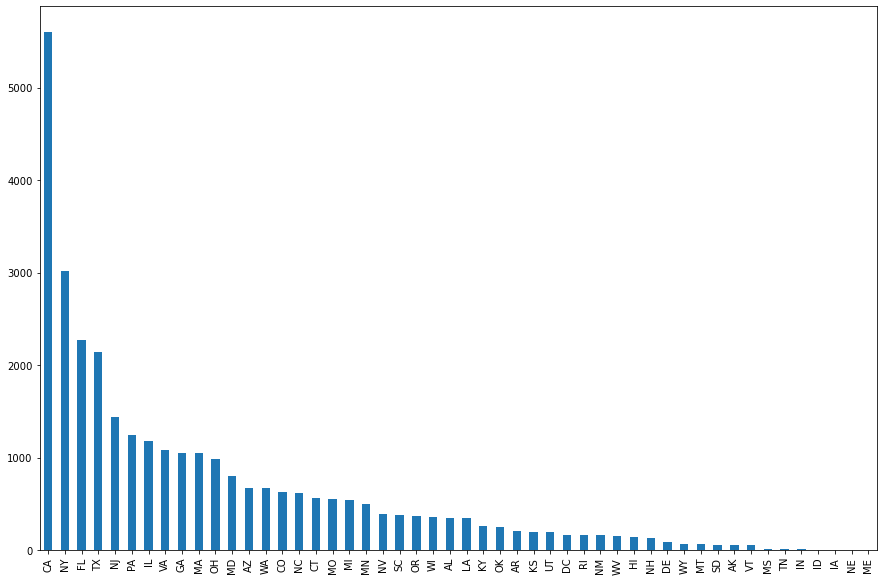

In [57]:
#Analyzing and plotting address states
plt.figure(figsize=[15,10]) 
df5["addr_state"].value_counts().plot.bar()
#Most of the loans are given to residents in California state 

    Count  % of Data
0   27776      88.95
1    2649       8.48
2     535       1.71
3     180       0.58
4      49       0.16
5      18       0.06
6      10       0.03
7       4       0.01
8       2       0.01
9       1       0.00
11      1       0.00


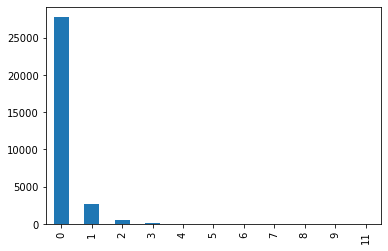

In [58]:
#Analyzing and plotting Delinq in 2 Yrs
categorical_data_frame("delinq_2yrs")
#Can be considered as ratings into one and maximum are 0
#Number of defaults in the last two years

   Count  % of Data
0  15196      48.67
1   8685      27.81
2   4529      14.50
3   2393       7.66
4    230       0.74
5    118       0.38
6     41       0.13
7     25       0.08
8      8       0.03


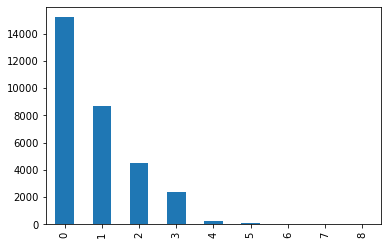

In [59]:
#Analyzing and plotting Inquiries Last 6 Months
categorical_data_frame("inq_last_6mths")
#Half of the accounts werent enquired by LC. We can also consider it as part of ratings 

    Count  % of Data
6    3351      10.73
7    3325      10.65
8    3190      10.22
9    2938       9.41
5    2748       8.80
10   2413       7.73
11   2053       6.57
4    2047       6.56
12   1663       5.33
13   1369       4.38
3    1340       4.29
14   1049       3.36
15    806       2.58
16    627       2.01
2     522       1.67
17    487       1.56
18    352       1.13
19    261       0.84
20    185       0.59
21    160       0.51
22     98       0.31
23     64       0.20
24     47       0.15
25     43       0.14
26     17       0.05
28     17       0.05
27     16       0.05
30      8       0.03
29      7       0.02
31      6       0.02
34      4       0.01
33      3       0.01
32      2       0.01
35      2       0.01
42      1       0.00
38      1       0.00
39      1       0.00
36      1       0.00
41      1       0.00


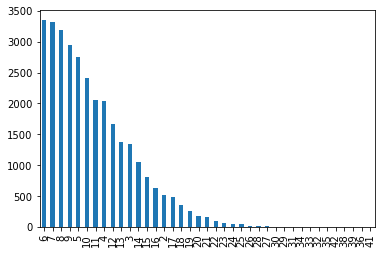

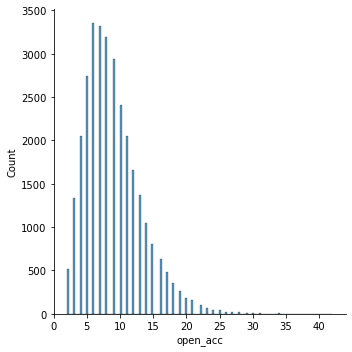

In [60]:
#Analyzing and plotting Open Accounts
categorical_data_frame("open_acc")
sns.displot(df5["open_acc"]) #Most of the records are concentrated on 5 -15
# so normally a customer keeps 5-15 open accounts

   Count  % of Data
0  29446      94.30
1   1729       5.54
2     42       0.13
3      6       0.02
4      2       0.01


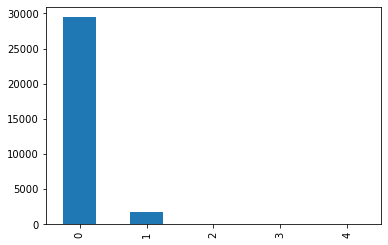

In [61]:
#Analyzing and plotting Public Records
categorical_data_frame("pub_rec") # Cases against individual in which loans are applied
# Most of the applicants dont have a public record against them

    Count  % of Data
15   1270       4.07
13   1240       3.97
14   1238       3.96
16   1232       3.95
17   1197       3.83
12   1190       3.81
20   1174       3.76
18   1165       3.73
11   1120       3.59
21   1115       3.57
19   1099       3.52
10   1052       3.37
22   1024       3.28
23    965       3.09
9     962       3.08
24    948       3.04
8     926       2.97
25    897       2.87
26    787       2.52
27    783       2.51
7     761       2.44
28    705       2.26
29    663       2.12
6     632       2.02
30    598       1.92
31    534       1.71
32    517       1.66
5     511       1.64
33    430       1.38
34    420       1.35
4     389       1.25
35    373       1.19
36    339       1.09
37    308       0.99
39    293       0.94
38    286       0.92
40    215       0.69
42    185       0.59
3     167       0.53
41    164       0.53
43    160       0.51
44    149       0.48
46    122       0.39
45    112       0.36
47    106       0.34
48     92       0.29
49     74    

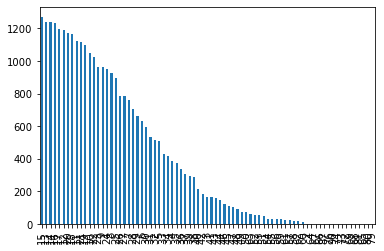

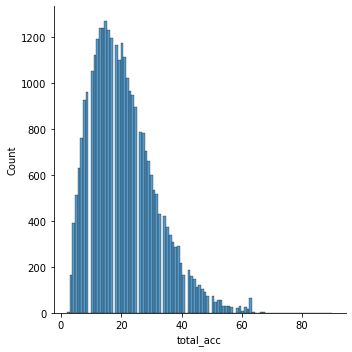

In [62]:
#Analyzing and plotting Total Accounts
categorical_data_frame("total_acc")
sns.displot(df5["total_acc"]) #Most of the records are concentrated on 5 -15
# so normally a customer keeps 5-15 open accounts

#### Continuous Data Analysis

Here we check the numerical data and we can check box plot as well as distribution plots of these

In [63]:
#Creating list of Continous Columns
continuous_columns = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment",
"annual_inc","dti","revol_bal","revol_util",
"total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
"total_rec_late_fee","recoveries", "collection_recovery_fee","last_pymnt_amnt"]
#Lets check how it varies across each other
# Creating Common Function to Analyse Numerical Columns
def continuous_data_frame(column,row,axes):
    sns.boxplot(df5[column],ax=axes[row,0])
    sns.distplot(df5[column],ax=axes[row,1])

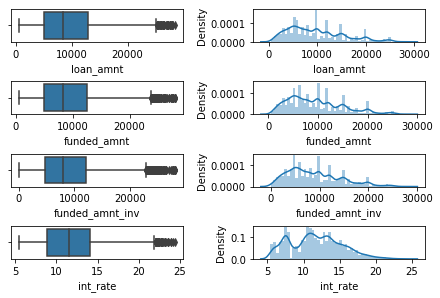

In [64]:
#Lets analyse these columns to check how is the distribution
# There are 17 columns so we can use subplots and see 4 of them at a time to check the outliers
fig, axes = plt.subplots(4, 2,constrained_layout = True)
for i in range(4):
    continuous_data_frame(continuous_columns[i],i,axes)

(30303, 40)


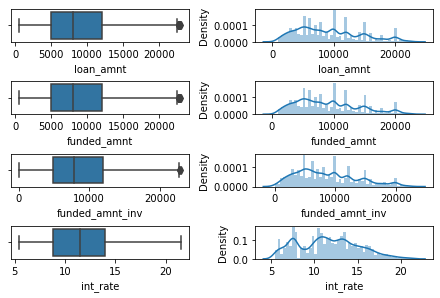

In [65]:
#Removing outliers from loan amnt and int_rate, since loan_amnt is highly correlated with others 
#no need explicit outlier removal
df5 = df5[df5["loan_amnt"] < 23000] # Removing Outliers from Loan Amount
df5 = df5[df5["int_rate"] < 21.5] # Removing Outliers from Int_rate
print(df5.shape)
#Creating Subplots for Loan Amount, Funded Amount, Funded Amount Inv, Int Rate
fig, axes = plt.subplots(4, 2,constrained_layout = True)
for i in range(4):
    continuous_data_frame(continuous_columns[i],i,axes)

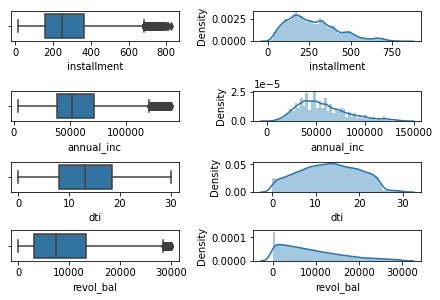

In [66]:
# #Creating Subplots for Installments, Annual Income, DTI, Revol Balance
fig, axes = plt.subplots(4, 2,constrained_layout = True)
rows = 0 
for i in range(4,8):
    continuous_data_frame(continuous_columns[i],rows,axes)
    rows = rows + 1

(28246, 40)


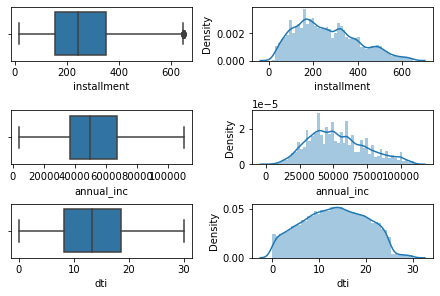

In [67]:
df5 = df5[df5["installment"] < 650] # Removing outliers for installment
df5 = df5[df5["annual_inc"] < 110000] # Removing outliers for annual_inc
print(df5.shape)
fig, axes = plt.subplots(3, 2,constrained_layout = True)
rows = 0 
#Creating Subplots for Installment, Annual Income, DTI
for i in range(4,7):
    continuous_data_frame(continuous_columns[i],rows,axes)
    rows = rows + 1
#revol_bal and revol_util are related since revol_util

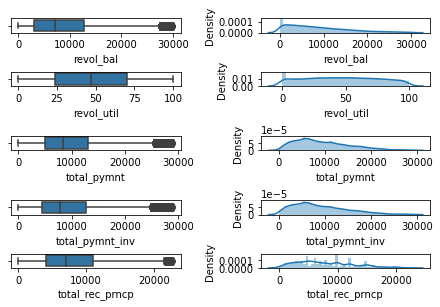

In [68]:
#Creating Subplots for Revol Balance, Revol Util, Total Payment, Total Payment Inv, Total Rec Prncp
fig, axes = plt.subplots(5, 2,constrained_layout = True)
rows = 0 
for i in range(7,12):
    continuous_data_frame(continuous_columns[i],rows,axes)
    rows = rows + 1
#Not removing outliers as we might require for charge off Analysis

### Derived Matrices

Lets derive the date of year and columns and then analyse each


<AxesSubplot:>

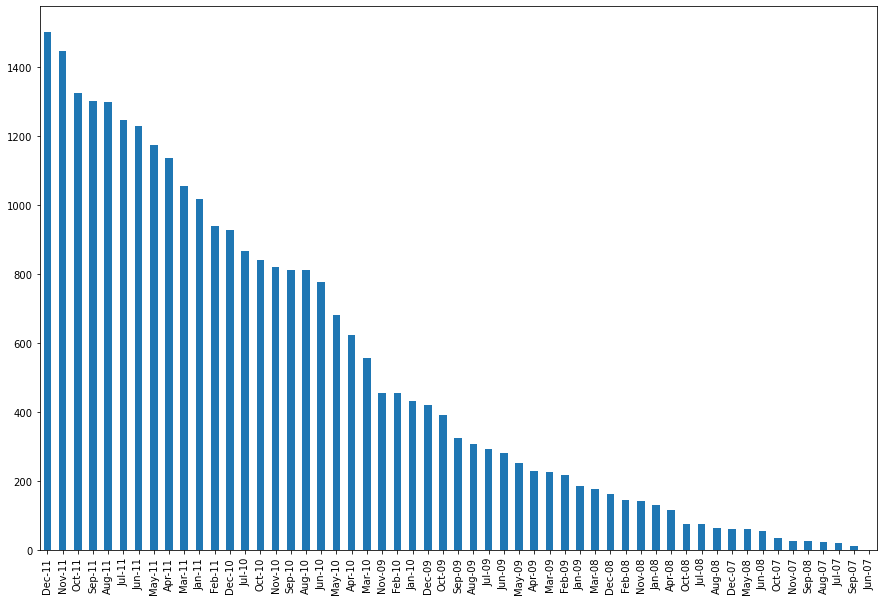

In [69]:
#Before Deriving we can do an analysis on the dates colum
#Issue Date, earliest credit line date
plt.figure(figsize=[15,10]) 
df5["issue_d"].value_counts().plot.bar()

In [70]:
#issue_d conversion
df6 = pd.DataFrame(df5)
df6["issue_d_year"] = pd.DatetimeIndex(df6["issue_date"]).year
df6["issue_d_month"] = pd.DatetimeIndex(df6["issue_date"]).month
#earliest_cr_line conversion
df6["earliest_cr_line_year"] = pd.DatetimeIndex(df6["earliest_cr_line_date"]).year
df6["earliest_cr_line_month"] = pd.DatetimeIndex(df6["earliest_cr_line_date"]).month
#last_pymnt_d conversion
df6["last_pymnt_d_year"] = pd.DatetimeIndex(df6["last_pymnt_date"]).year
df6["last_pymnt_d_month"] = pd.DatetimeIndex(df6["last_pymnt_date"]).month
#last_credit_pull_d conversion
df6["last_credit_pull_d_year"] = pd.DatetimeIndex(df6["last_credit_pull_date"]).year
df6["last_credit_pull_d_month"] = pd.DatetimeIndex(df6["last_credit_pull_date"]).month
#Lets see the shape of the dataframe
print(df6.shape)
df6.head()

(28246, 48)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date,earliest_cr_line_date,last_pymnt_date,last_credit_pull_date,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,2011-12-01,1985-01-01,2015-01-01,2016-05-01,2011,12,1985,1,2015,1,2016,5
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,2011-12-01,1999-04-01,2013-04-01,2013-09-01,2011,12,1999,4,2013,4,2013,9
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,2011-12-01,2001-11-01,2014-06-01,2016-05-01,2011,12,2001,11,2014,6,2016,5
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,2011-12-01,1996-02-01,2015-01-01,2016-04-01,2011,12,1996,2,2015,1,2016,4
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963.0,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0,2011-12-01,2004-11-01,2015-01-01,2016-01-01,2011,12,2004,11,2015,1,2016,1


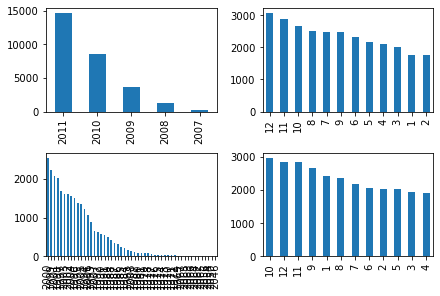

<Figure size 2160x720 with 0 Axes>

In [71]:
#Creating Subplots for Issue Year & Month, Earliest Credit Line Year & Month
fig, axes = plt.subplots(2, 2,constrained_layout = True)
plt.figure(figsize=[30,10]) 
dates_column = [["issue_d_year","issue_d_month"],["earliest_cr_line_year","earliest_cr_line_month"]]
for i in range(2):
    df6[dates_column[i][0]].value_counts().plot.bar(ax=axes[i,0])
    df6[dates_column[i][1]].value_counts().plot.bar(ax=axes[i,1])

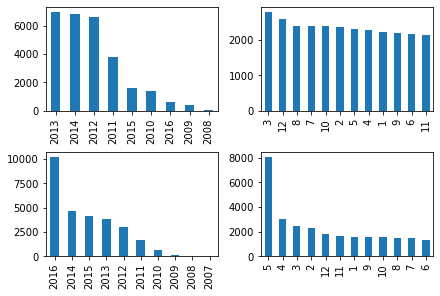

<Figure size 2160x720 with 0 Axes>

In [72]:
#Creating Subplots for Last Payment_d Year & Month, Last Credit Pull Year & Month
fig, axes = plt.subplots(2, 2,constrained_layout = True)
plt.figure(figsize=[30,10]) 
dates_column = [["last_pymnt_d_year","last_pymnt_d_month"],["last_credit_pull_d_year","last_credit_pull_d_month"]]
for i in range(2):
    df6[dates_column[i][0]].value_counts().plot.bar(ax=axes[i,0])
    df6[dates_column[i][1]].value_counts().plot.bar(ax=axes[i,1])

### Bi-Variate  / Multi -Variate Analysis

Now what we want to determine in this case study is that how factors affect whether a loan is paid back or not
i.e., Fully-Paid,Charged Off
So based on the columns of loan_status we need to analyse how it correlates with other factors<br>
So lets analyse the following:
- loan_status against numerical-jibin (loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc
  dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv
- loan_amt vs funded amt 
- loan_status against category - you ( term, grade,emp_length,home_ownership,verification_status,purpose,addr_state,month and years


In [73]:
#Catergorizing Columns into Final Numerical and Category to analyze futher.
final_numerical = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment",
"annual_inc","dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc"
"total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
"total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","pub_rec_bankruptcies"]
final_category = ["term","grade","sub_grade","emp_length","home_ownership","verification_status",
"issue_d","loan_status","purpose","addr_state","earliest_cr_line",
"last_pymnt_d","last_credit_pull_d","issue_d_month","issue_d_year"]
df6.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date,earliest_cr_line_date,last_pymnt_date,last_credit_pull_date,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.7,9,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0,2011-12-01,1985-01-01,2015-01-01,2016-05-01,2011,12,1985,1,2015,1,2016,5
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,9.4,4,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0,2011-12-01,1999-04-01,2013-04-01,2013-09-01,2011,12,1999,4,2013,4,2013,9


In [74]:
#Catergorizing different Numerical Columns to relatable business columns
loan_numerical_statistics = ["loan_amnt","int_rate","installment","annual_inc"]
payment_numerical_statistics = ["annual_inc","total_pymnt","total_pymnt_inv","installment","last_pymnt_amnt"]
behavorial_numerical_statistics = ["delinq_2yrs","inq_last_6mths","pub_rec","pub_rec_bankruptcies"]
rating_numerical_indicators = ["dti","delinq_2yrs","inq_last_6mths","open_acc","total_acc"]
charge_off_numerical_indicators = ["revol_bal","revol_util","total_rec_prncp","total_rec_int",
"total_rec_late_fee","recoveries","collection_recovery_fee"]

In [75]:
#Catergorizing different Categorical Columns based on number of categories and date type.
lower_categories = ["term","home_ownership","verification_status","loan_status"]
higher_categories = ["grade","sub_grade","emp_length","purpose","addr_state","pub_rec_bankruptcies"]
date_categories = [["issue_d","issue_d_month","issue_d_year"],
                   ["earliest_cr_line","earliest_cr_line_month","earliest_cr_line_year"],
                   ["last_pymnt_d","last_pymnt_d_year","last_pymnt_d_month"],
                   ["last_credit_pull_d","last_credit_pull_d_year","last_credit_pull_d_month"]]
Target = "loan_status" # Either Fully Paid or Charged Off

#### Analysis

- loan_numerical_statistics vs loan status -> How the loan behaves with charged off or Fully paid
- rating_numerical_indicators vs loan status 
- behavorial_numerical_statistics vs loan status

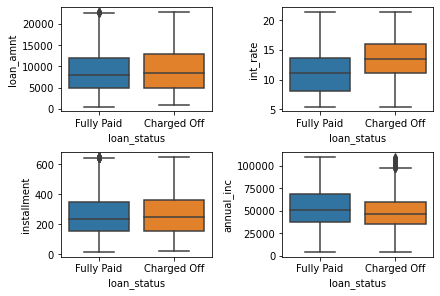

<Figure size 2160x720 with 0 Axes>

In [76]:
#Plotting Subplots for Loan Status vs Loan Amount, Int_rate, Installments, Annual Income
fig, axes = plt.subplots(2, 2,constrained_layout = True)
plt.figure(figsize=[30,10])
image_columns = [loan_numerical_statistics[0:2],loan_numerical_statistics[2:4]]
for i in range(2):
    sns.boxplot(x="loan_status",y=image_columns[i][0],data=df6,ax=axes[i,0])
    sns.boxplot(x="loan_status",y=image_columns[i][1],data=df6,ax=axes[i,1]) 
#We can see that higher the interest rate more the chances that it wont be fully paid
#Higher the annual income more the chances that it will get paid

<AxesSubplot:xlabel='loan_status', ylabel='revenue'>

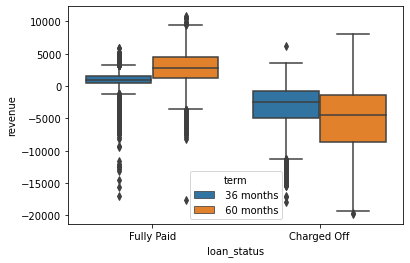

In [77]:
#Finding Revenue of Business Model
df7 = pd.DataFrame(df6)
df7["revenue"] =   df7["total_pymnt"] - df7["loan_amnt"] 
sns.boxplot(x="loan_status",y="revenue",hue = "term" ,data=df7)
# Here we can see that the magnitude of losses is more in the 60 months scenario

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

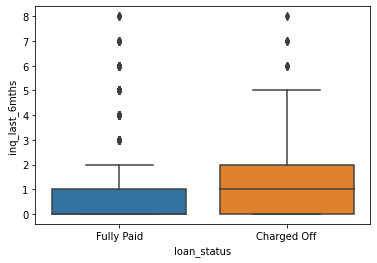

In [78]:
# We tried analysis between Rating Indicators vs Loan Status
# No Conclusion could be derived.
rating_numerical_indicators = ["dti","delinq_2yrs","inq_last_6mths","open_acc","total_acc"]
sns.boxplot(x="loan_status",y="inq_last_6mths",data=df7)

In [79]:
#Glancing at the data
df7.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date,earliest_cr_line_date,last_pymnt_date,last_credit_pull_date,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,revenue
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,2011-12-01,1985-01-01,2015-01-01,2016-05-01,2011,12,1985,1,2015,1,2016,5,863.155187
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,2011-12-01,1999-04-01,2013-04-01,2013-09-01,2011,12,1999,4,2013,4,2013,9,-1491.290000
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,2011-12-01,2001-11-01,2014-06-01,2016-05-01,2011,12,2001,11,2014,6,2016,5,605.666844
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,2011-12-01,1996-02-01,2015-01-01,2016-04-01,2011,12,1996,2,2015,1,2016,4,2231.890000
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963.0,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0,2011-12-01,2004-11-01,2015-01-01,2016-01-01,2011,12,2004,11,2015,1,2016,1,632.210000


<AxesSubplot:xlabel='loan_status', ylabel='collection_recovery_fee'>

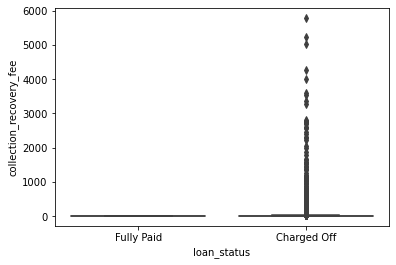

In [80]:
# We tried analysis between Charge Off Indicators vs Loan Status
# No Conclusion could be derived.
charge_off_numerical_indicators = ["revol_bal","revol_util","total_rec_prncp","total_rec_int",
"total_rec_late_fee","recoveries","collection_recovery_fee"]
sns.boxplot(x="loan_status",y="collection_recovery_fee",data=df7)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

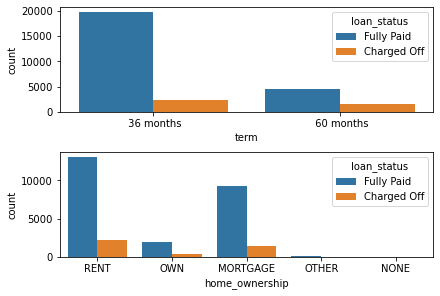

In [81]:
# We tried analysis between Lower Caterogical columns vs Loan Status
lower_categories = ["term","home_ownership","verification_status"]
fig, axes = plt.subplots(2, 1,constrained_layout = True)
sns.countplot(x=lower_categories[0], hue="loan_status",data=df6,ax=axes[0])
sns.countplot(x=lower_categories[1], hue="loan_status",data=df6,ax=axes[1]) 

<AxesSubplot:>

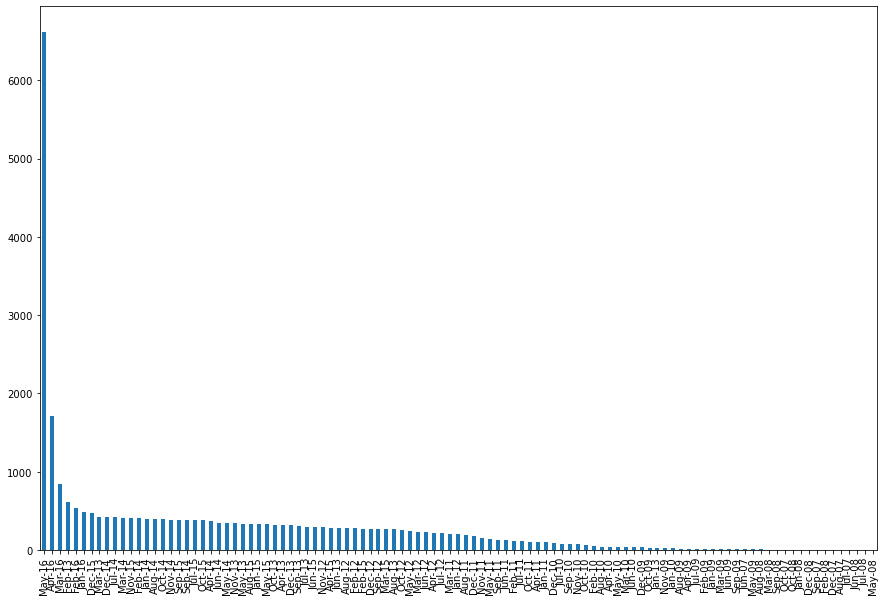

In [82]:
#analysis of Last Credit pull date
plt.figure(figsize=[15,10]) 
df5["last_credit_pull_d"].value_counts().plot.bar()
#Highest was done in Mar-16

<AxesSubplot:xlabel='verification_status', ylabel='count'>

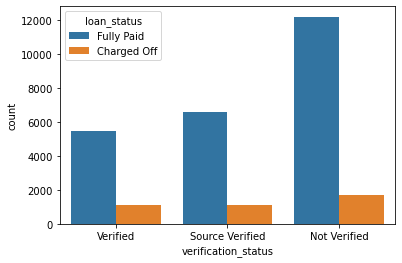

In [83]:
#analysis between loan status and Verification status
sns.countplot(x=lower_categories[2], hue="loan_status",data=df6) 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

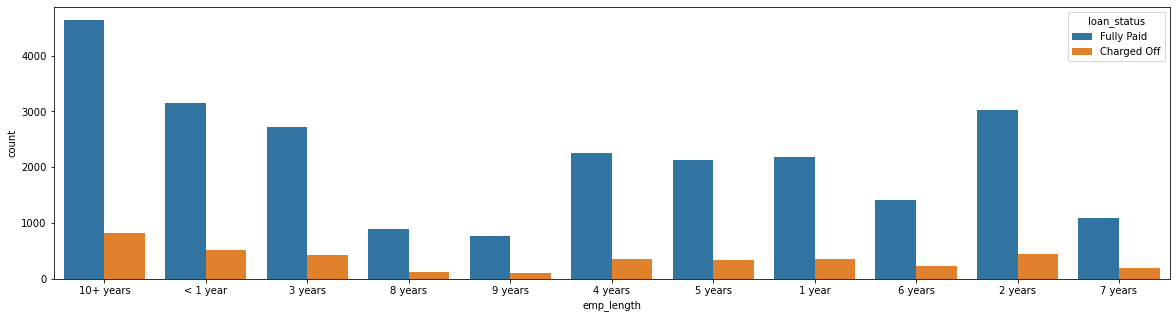

In [84]:
# We tried analysis between Higher Caterogical columns vs Loan Status
higher_categories = ["grade","sub_grade","emp_length","purpose","addr_state","pub_rec_bankruptcies"]
plt.figure(figsize=[20,5])
sns.countplot(x="emp_length", hue="loan_status",data=df6)
#More the experience in his job more the confidence on his job security
#Hence more number of people apply
#It is also shown that lesser the chances are of default if he has more experience

<AxesSubplot:xlabel='purpose', ylabel='count'>

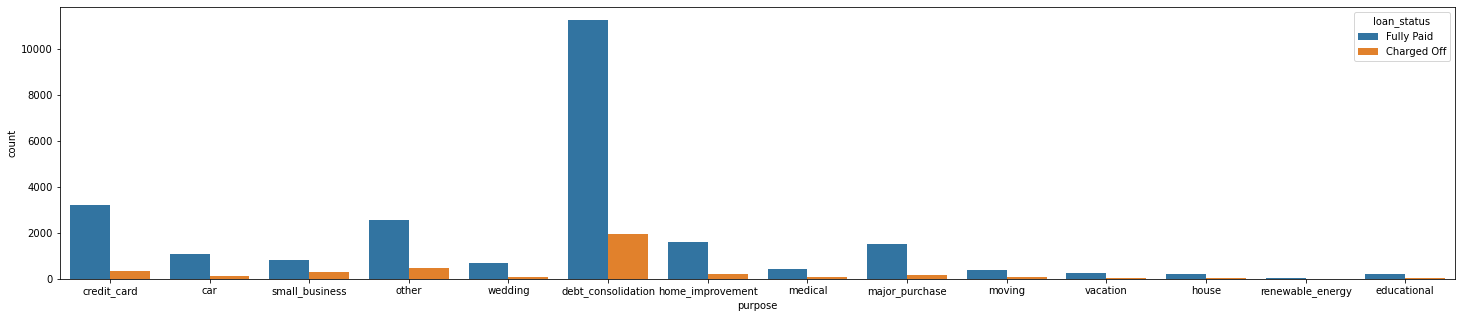

In [85]:
# Analysis of Purpose vs Loan Status
plt.figure(figsize=[25,5])
sns.countplot(x="purpose", hue="loan_status",data=df6)

<AxesSubplot:xlabel='addr_state', ylabel='count'>

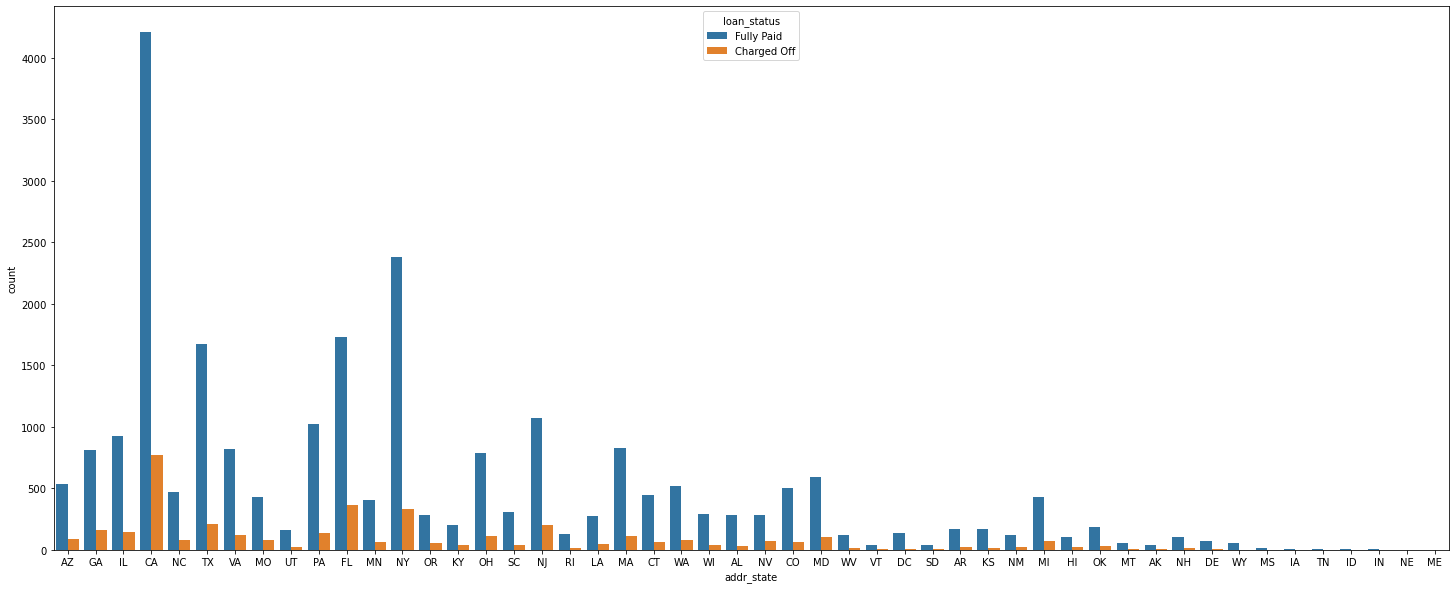

In [86]:
# Analysis of Address state vs Loan Status
plt.figure(figsize=[25,10])
sns.countplot(x="addr_state", hue="loan_status",data=df6)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

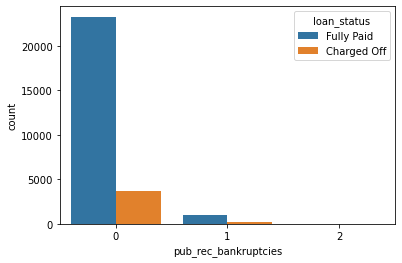

In [87]:
# Analysis of Public Rec Bankruptcies vs Loan Status
sns.countplot(x="pub_rec_bankruptcies", hue="loan_status",data=df6)

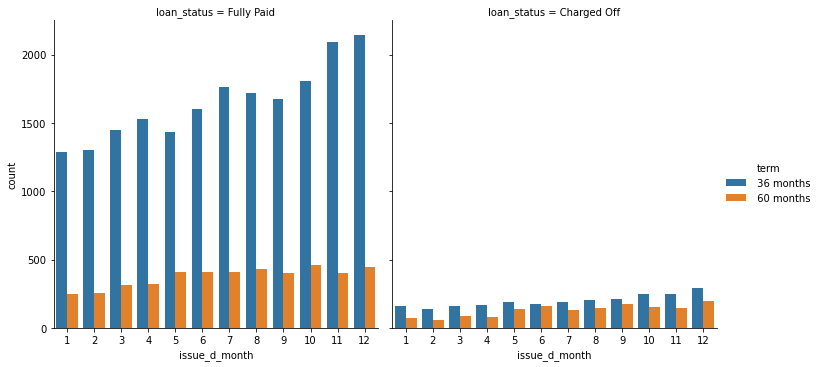

In [88]:
# Analysis of Date Categories
date_categories = [["issue_d","issue_d_month","issue_d_year"],
                   ["earliest_cr_line","earliest_cr_line_month","earliest_cr_line_year"],
                   ["last_pymnt_d","last_pymnt_d_year","last_pymnt_d_month"],
                   ["last_credit_pull_d","last_credit_pull_d_year","last_credit_pull_d_month"]]
#Analysis on Loan Status vs Term vs Issue Month
sns.catplot(x="issue_d_month", hue="term", col="loan_status",data=df6, kind="count")

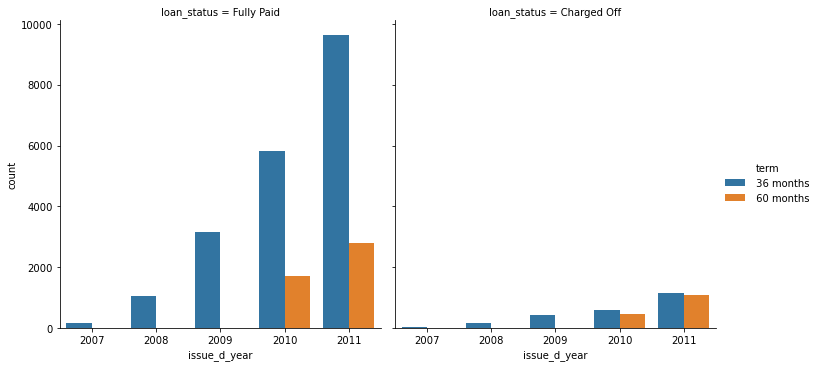

In [89]:
#Analysis on Loan Status vs Term vs Issue year
sns.catplot(x="issue_d_year", hue="term", col="loan_status",data=df6, kind="count")
#60 Term loans were introduced in the year 2010

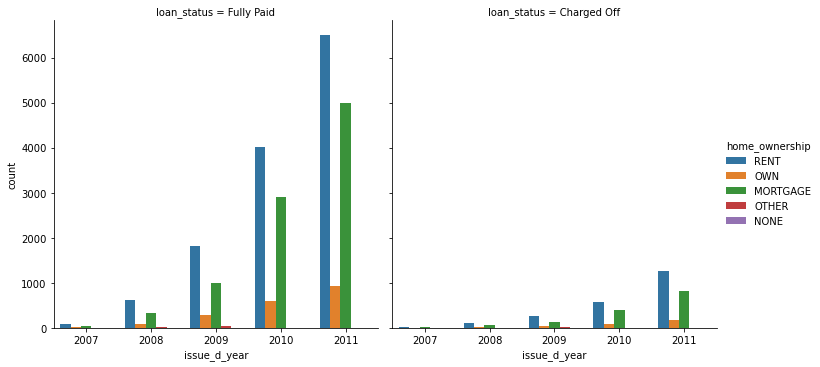

In [90]:
#Analysis on Home Ownership vs Loan Status vs Issue year
sns.catplot(x="issue_d_year", hue="home_ownership", col="loan_status",data=df6, kind="count")
# During the starting days of the company 
# Employees whose house_ownership is Rent and Mortgage tend to apply more loans 

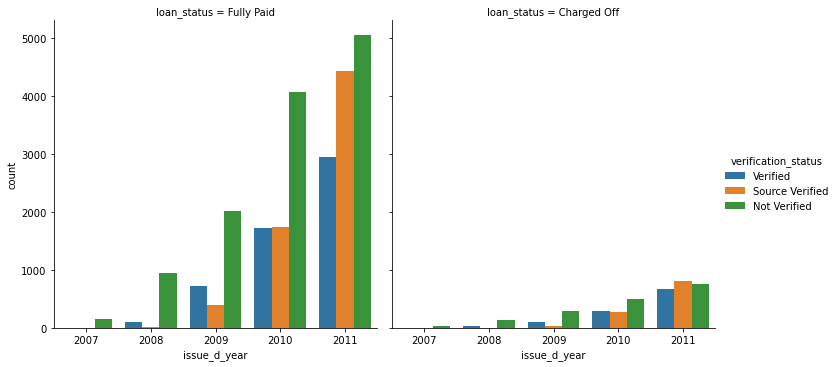

In [91]:
#Analysis on Loan Status vs Verification Status vs Issue year
sns.catplot(x="issue_d_year", hue="verification_status", col="loan_status",data=df6, kind="count")
# During the starting days of the company dint verify the income at all and were giving loans
# which is reflected in the charged off
# As the company grew more verification was done charged off became less 

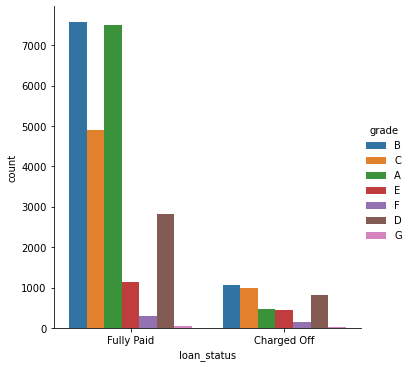

In [92]:
#Analysis on Grade vs Loan Status 
sns.catplot(x="loan_status", hue="grade",data=df6, kind="count")

<AxesSubplot:xlabel='issue_d_year', ylabel='revenue'>

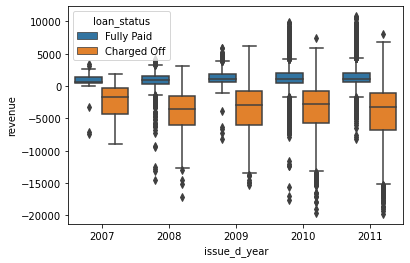

In [93]:
#Analysis on Revenue vs Loan Status vs Issue year
sns.boxplot(x="issue_d_year",y="revenue",data=df7,hue="loan_status")

### Conclusion

- More Loans need to be **verified** which will help **reduce the financial loss**
- **Lowering the interest rates** can lead to **less number of defaulters**
- **Better Annual Income** , more the chances that the person **does not default**
- Persons who **own property** tend to pay back the loans, they should be given more priority
- **60 Term loans** have higher profits as well as losses. It can be reduced by
  - Giving **higher grade loans** like A,B,C,D
  - Doing more **verification** in this type of term loan
